In [37]:
!python process_data.py

/Users/adorman/Documents/master-thesis/src/utils_data_preprocessing.py:91: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['middle_peak'] = round((adata.var.end - adata.var.start)/2 + adata.var.start).astype('uint32')
View of AnnData object with n_obs × n_vars = 45 × 499870
    var: 'chr', 'start', 'end', 'middle_peak', 'sequence'
/Users/adorman/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/adorman/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


# N in sequences

2145
1027
942.7429406037


<Axes: >

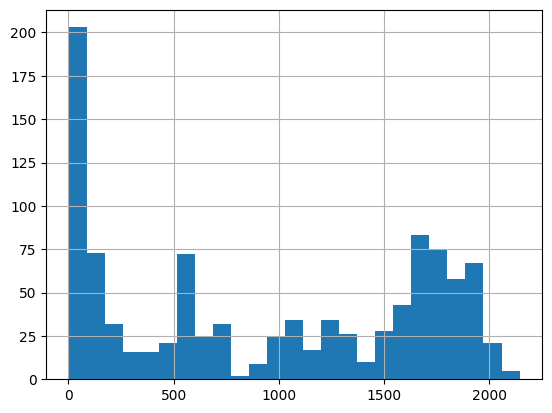

In [27]:
print(np.max(count_N))
print(np.sum(count_N >0))
print(np.mean(count_N[count_N>0]))

count_N[count_N>0].hist(bins=25)

In [51]:
test = np.array([[0, 1, 3], [0, 5, 2]])
total = test.sum(axis=1)
print(test)
print(total)

(test.T/total * 100000).T.shape



[[0 1 3]
 [0 5 2]]
[4 7]


(2, 3)

# Distribution peak length

852.3285106759125


2263
878.0
(6,)


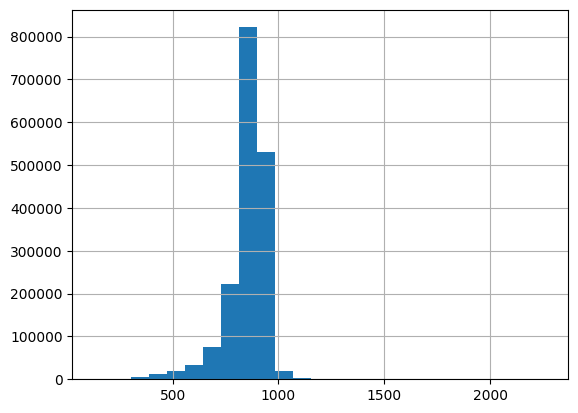

In [33]:
len_peak = adata.var.end - adata.var.start 
print(len_peak.mean())

len_peak.hist(bins=25)

print(len_peak.max())
print(len_peak.median())
print(len_peak[len_peak > 2000].shape)


# Distribution GC content

<Axes: >

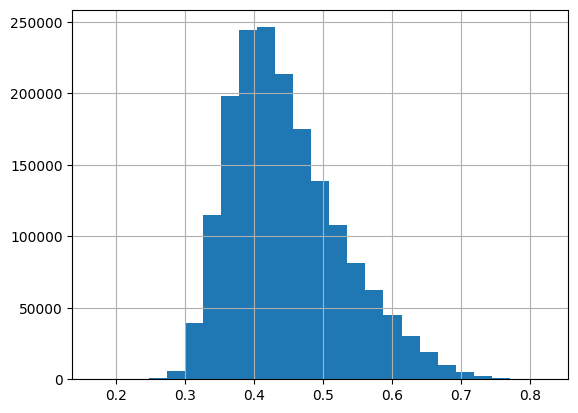

In [56]:
peaks.GC_cont.hist(bins=25)

# Distribution coverage

In [202]:
coverage = []
with open("../results/coverage_by_pseudo_bulk.txt", "r") as grilled_cheese:
	coverage = grilled_cheese.read().splitlines()


In [203]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

coverage = np.array(coverage)
cov_value = coverage[[is_float(x) for x in coverage]]
names = coverage[np.logical_not([is_float(x) for x in coverage])]

coverage = pd.DataFrame({"name": names[:-1], "coverage": cov_value})
coverage.name = coverage.name.str.removeprefix("../results/bam_cell_type/").str.removesuffix(".bam")
coverage

,name,coverage
0,D8_1/Neuroblast,0.00061318
1,D8_1/Somite,8.95754
2,D8_1/Neuronal,0.309335
3,D8_1/Myogenic,0.160304
4,D8_1/Mesenchymal,0.63683
5,D8_2/Somite,10.3794
6,D8_2/Neuronal,0.264931
7,D8_2/Myogenic,0.152165
8,D8_2/Mesenchymal,0.533022
9,D12_1/Neuroblast,0.202706


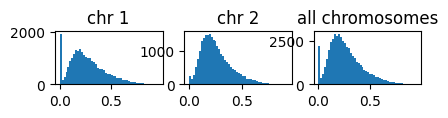

In [34]:
import pyBigWig
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

chrom = ['1','2']
bw = pyBigWig.open('../results/bam_cell_type/Mesenchymal.bw')

def compute_cov(start, bw):
    return np.count_nonzero(bw.values(c, start, start + 10000))/10000

all_cov =[]
fig = plt.figure()    
for i, c in enumerate(chrom):
    coverage = [compute_cov(i*10000, bw) for i in range(0,math.floor(bw.chroms(c)/10000))]
    all_cov.append(coverage)

    ax = fig.add_subplot(6, 4, i+1)
    ax.hist(coverage, bins=50)
    ax.set_title(('chr ' + c))

all_cov = list(itertools.chain(*all_cov))
ax = fig.add_subplot(6, 4, i+2)
ax.hist(all_cov, bins=50)
ax.set_title('all chromosomes')

fig.savefig("cov.pdf")
 

# Extract continous track 

In [35]:
import pickle

with open('../results/peaks_location.pkl', 'rb') as file:
    peaks = pickle.load(file)

In [50]:
test = peaks.iloc[:10000].copy()
test['middle'] = np.round((test.end - test.start)/2 + test.start).astype('uint32')

test

,chr,start,end,sequence,middle
peakID,,,,,
10:100004794-100005512,10,100004794,100005512,TAGCCAGGGATGGTGGCACATGCCTGTGGTCTCAGCTACTTGGGAG...,100005153
10:100004820-100005525,10,100004820,100005525,ATGCCTGTGGTCTCAGCTACTTGGGAGGCTAGAATGGGAGGATCAC...,100005172
10:100004829-100005566,10,100004829,100005566,GGCTAGAATGGGAGGATCACTTGAGCCTGGGAGGTTGAGGCTGCAG...,100005198
10:100005947-100006870,10,100005947,100006870,CACAGAGAGCAGATAAAGCAAAACCAATGGATGCAAACAGCATGGG...,100006408
10:100005972-100006890,10,100005972,100006890,CCAATGGATGCAAACAGCATGGGGTATAAATGCAGCATTCCAAAGC...,100006431
...,...,...,...,...,...
10:113403761-113404600,10,113403761,113404600,TTCCAGCTTTGGCCTTCGTTGATGTTTATGTCTAGGAGGTAGCTTT...,113404180
10:113406641-113407581,10,113406641,113407581,CACAGATATCGTCAGTCTCTGCAGAGGTGGCTTAACTTCTTCCTTA...,113407111
10:113406656-113407558,10,113406656,113407558,TGGACACAGATATCGTCAGTCTCTGCAGAGGTGGCTTAACTTCTTC...,113407107


In [74]:
def get_continuous_ATAC(bw, seq_loc, seq_len=1000, window_size=200):
    bp_around = int(window_size/2 + seq_len/2)
    val = bw.values(seq_loc.chr, seq_loc.middle - bp_around, 
                    seq_loc.middle + bp_around)
    ATAC = [sum(val[i:(i+window_size+1)]) for i in range(0,seq_len+1)]

    return ATAC

#bw = pyBigWig.open('../results/bam_cell_type/Mesenchymal.bw')

ATAC = test.apply(lambda x: get_continuous_ATAC(bw, x), axis=1)
ATAC

peakID
10:100004794-100005512    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10:100004820-100005525    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10:100004829-100005566    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10:100005947-100006870    [216.0, 218.0, 220.0, 222.0, 224.0, 226.0, 228...
10:100005972-100006890    [262.0, 264.0, 266.0, 268.0, 270.0, 272.0, 274...
                                                ...                        
10:113403761-113404600    [174.0, 172.0, 170.0, 168.0, 166.0, 164.0, 162...
10:113406641-113407581    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10:113406656-113407558    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10:113408778-113409664    [271.0, 271.0, 271.0, 271.0, 271.0, 271.0, 271...
10:113408823-113409725    [240.0, 239.0, 238.0, 237.0, 236.0, 235.0, 234...
Length: 10000, dtype: object

# Create dataset for bias model training

In [ ]:
!python get_sequence_ATAC.py

In [36]:
import pickle

with open('../results/match_GC.pkl', 'rb') as file:
    seq = pickle.load(file)

In [37]:
seq

,chr,start,sequence
0,chr2,194463291.0,ACATATAATATATAATTCTATAATATATATTATATAATCTATATAA...
1,chr6,67801307.0,AATAGTAAATACACAGAAAAACAAATAATATTATAACACTGTAATT...
2,chr16,10697109.0,TAACTAATATTATCAGATTTTTCCAGAGATAATTCATACATATATA...
3,chr18,66528404.0,TCTAGGGAAAGTGCAACACAATAGAGAGCCTCTGAAATTTTTATAT...
4,chr21,22910311.0,ACATTAAATTATGGCTGAAATATATAAATACCTTGAGGAAAACACT...
...,...,...,...
800,chr22,43341731.0,CTCCCCTGCAGGGCGACCCAGCCCTCCTAGCACAGGCTGCTCCCTT...
801,chr21,45541257.0,GGTGGCACCCAGGCAAAGGCGGCCAGTGAGATGCAGCCTGGCTCCC...
802,chr1,997963.0,AGGCACAGACTGGGGCCTGGAGGGCCAGTGCTGGTGGGAGGGCTCG...
803,chr2,120344025.0,AGGTAGGCGATAGGAAAGGTGAGGACTCTATCCAAGGTCACTCCTG...


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

from utils_data_preprocessing import encode_sequence

class SequenceDataset(Dataset):
    """Genomic sequence pytorch dataset with continuous ATAC signal"""

    def __init__(self, sequences):
        """
        Arguments:
            sequences (pd.series): Pandas series of genetic sequences 
            
        """
        self.sequences = sequences
        self.len_seq = len(self.sequences[0])

        #Encode the sequences
        self.encodes_seq = encode_sequence(self.sequences)

    def __len__(self):
        return len(self.sequences.shape[0])

    def __getitem__(self, idx):

        return self.sequence_ATAC[idx]

In [39]:
557*2+1000

2114

In [43]:
import pickle

with open('../results/Somite.pkl', 'rb') as file:
    seq = pickle.load(file)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x110f2a1d0>>
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/LeKIra/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
seq

2114

In [5]:
!python ATAC_track_background.py

In [4]:
import pickle

with open('../results/match_GC.pkl', 'rb') as file:
    seq = pickle.load(file)
with open('../results/background/D8_1/Somite.pkl', 'rb') as file:
    ATAC = pickle.load(file)

print(seq)
ATAC

       chr        start                                           sequence
0     chr2  194463291.0  ACATATAATATATAATTCTATAATATATATTATATAATCTATATAA...
1     chr6   67801307.0  AATAGTAAATACACAGAAAAACAAATAATATTATAACACTGTAATT...
2    chr16   10697109.0  TAACTAATATTATCAGATTTTTCCAGAGATAATTCATACATATATA...
3    chr18   66528404.0  TCTAGGGAAAGTGCAACACAATAGAGAGCCTCTGAAATTTTTATAT...
4    chr21   22910311.0  ACATTAAATTATGGCTGAAATATATAAATACCTTGAGGAAAACACT...
..     ...          ...                                                ...
800  chr22   43341731.0  CTCCCCTGCAGGGCGACCCAGCCCTCCTAGCACAGGCTGCTCCCTT...
801  chr21   45541257.0  GGTGGCACCCAGGCAAAGGCGGCCAGTGAGATGCAGCCTGGCTCCC...
802   chr1     997963.0  AGGCACAGACTGGGGCCTGGAGGGCCAGTGCTGGTGGGAGGGCTCG...
803   chr2  120344025.0  AGGTAGGCGATAGGAAAGGTGAGGACTCTATCCAAGGTCACTCCTG...
804  chr16     980323.0  GGCCAGAACAGGGGGTAGGAGGCGCGTCCTGTGCGGTCGGTGGCGG...

[805 rows x 3 columns]


0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [1484.0, 1475.0, 1466.0, 1457.0, 1448.0, 1439....
2      [85.0, 87.0, 89.0, 91.0, 93.0, 95.0, 97.0, 99....
3      [166.0, 161.0, 156.0, 151.0, 146.0, 141.0, 136...
4      [141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141...
                             ...                        
800    [5656.0, 5685.0, 5710.0, 5735.0, 5760.0, 5785....
801    [15035.0, 15013.0, 14988.0, 14962.0, 14938.0, ...
802    [32464.0, 32521.0, 32575.0, 32637.0, 32699.0, ...
803    [7424.0, 7416.0, 7408.0, 7400.0, 7391.0, 7382....
804    [50484.0, 50505.0, 50556.0, 50607.0, 50658.0, ...
Length: 805, dtype: object

In [6]:
sum(ATAC[0])

0.0